# Anomaly Detection

## Data collection and exploration

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read dataset
data=pd.read_csv('/content/drive/MyDrive/AI-Inernship/Healthcare Providers.csv')
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [7]:
data.info()  # information about the data such as entries, datatypes, no of rows and columns, count etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

## Data Preprocessing
* The very first step of preprocessing is starting from droping the index columns.

* As index column does not have any significance for EDA  

In [8]:
df=data.drop('index',axis=1)
df.head()

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [9]:
# Printing all the columns in the dataset
df.columns

Index(['National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

**Handling of name columns**



*   As we can see there are three columns in the dataset for name of the provider.

*   we can create a separate column for the name of the provider as **'Name of The Provider'** by combining given three columns.



In [10]:
# creating a new column for name of the provider by joining existing three columns
df['First Name of the Provider'] = df['First Name of the Provider'].fillna("")
df['Middle Initial of the Provider'] = df['Middle Initial of the Provider'].fillna("")
df['First Name of the Provider']=df['First Name of the Provider'] + df['Middle Initial of the Provider']+ " " +  df['Last Name/Organization Name of the Provider']
df.rename(columns={'First Name of the Provider':'Name of the Provider'},inplace=True)
df['Name of the Provider'] = df['Name of the Provider'].str.strip()




In [11]:
# We are droping unnecessary columns
drop_cols=['Middle Initial of the Provider',
           'Last Name/Organization Name of the Provider']
df=df.drop(drop_cols,axis=1)



*   Similarly there are two columns for the address of the provider.

*   We can combine both of them as a single column name **'Street Address of the Provider'**.



In [12]:
# joining of street addresses
df['Street Address 2 of the Provider'] = df['Street Address 2 of the Provider'].fillna("")
df['Street Address 1 of the Provider']=df['Street Address 1 of the Provider'] + df['Street Address 2 of the Provider']
df.drop(['Street Address 2 of the Provider'],axis=1,inplace=True)
df.rename(columns={'Street Address 1 of the Provider':'Street Address of the Provider'},inplace=True)


In [13]:
# converting the values like M.D. as MD As it has the same meaning
df['Credentials of the Provider']=df['Credentials of the Provider'].str.replace(".","")

In [14]:
# @title Preprocessing for numerical columns
df.iloc[:,16:]=df.iloc[:,16:].apply(lambda x: x.str.replace(',', ''))


In [15]:
# @title Converting columns of 'object' datatypes as 'Float'
object_cols = df.iloc[:,16:].columns
df[object_cols] = df[object_cols].apply(lambda x: x.astype(float))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   National Provider Identifier                              100000 non-null  int64  
 1   Name of the Provider                                      100000 non-null  object 
 2   Credentials of the Provider                               92791 non-null   object 
 3   Gender of the Provider                                    95746 non-null   object 
 4   Entity Type of the Provider                               100000 non-null  object 
 5   Street Address of the Provider                            100000 non-null  object 
 6   City of the Provider                                      100000 non-null  object 
 7   Zip Code of the Provider                                  100000 non-null  float64
 8   State

**inference**


*   As we can see above, Now as a result last seven columns have float datatype.

* These columns are one which are having numerical values.




In [17]:
# @title Handling Missing values in the dataset
# check for missing values
df.isnull().sum()

National Provider Identifier                                   0
Name of the Provider                                           0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
Entity Type of the Provider                                    0
Street Address of the Provider                                 0
City of the Provider                                           0
Zip Code of the Provider                                       0
State Code of the Provider                                     0
Country Code of the Provider                                   0
Provider Type                                                  0
Medicare Participation Indicator                               0
Place of Service                                               0
HCPCS Code                                                     0
HCPCS Description                                              0
HCPCS Drug Indicator     

In [18]:
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [19]:
df.isna().sum()

National Provider Identifier                                0
Name of the Provider                                        0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address of the Provider                              0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number o

**Inference**
* Now there is no missing value in each feature.

* To handle this we have use fillna() function and filled the null values with the mode of the perticular feature.

## Exploratory data analysis

## Visualization of categorical features - Univariate Analysis

---



In [20]:
df.head()

,National Provider Identifier,Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,SATYASREE UPADHYAYULA,MD,F,I,1402 S GRAND BLVDFDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,1346202256,WENDYP JONES,MD,F,I,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,1306820956,RICHARDW DUROCHER,DPM,M,I,20 WASHINGTON AVESTE 212,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,1770523540,JASPER FULLARD,MD,M,I,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,1073627758,ANTHONYE PERROTTI,DO,M,I,875 MILITARY TRLSUITE 200,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [21]:
df.columns

Index(['National Provider Identifier', 'Name of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address of the Provider',
       'City of the Provider', 'Zip Code of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator',
       'Number of Services', 'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

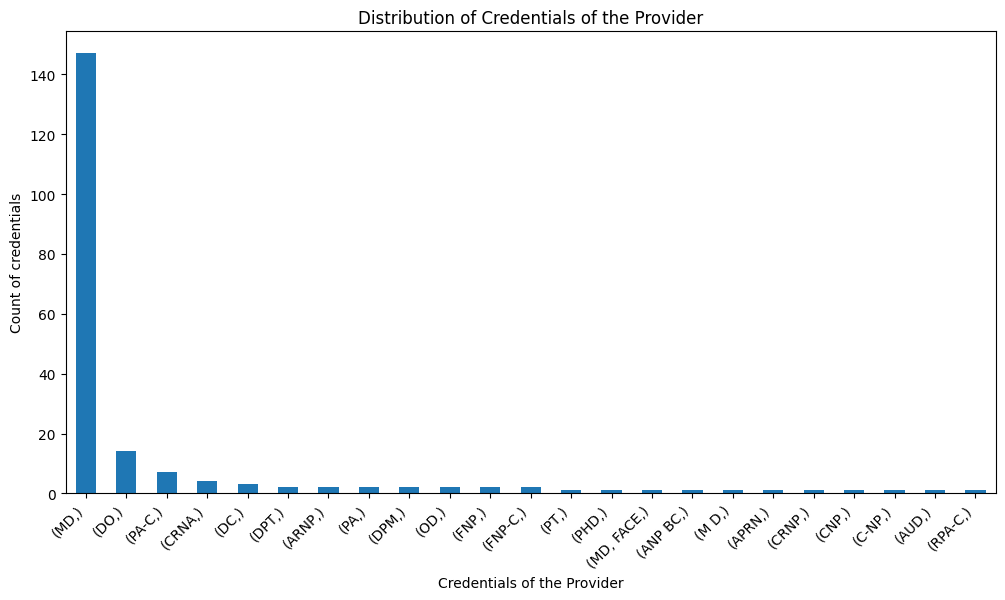

In [23]:
# @title Credential of the provider

Credential_counts = df.iloc[:200,2:3].value_counts()

# Plot the bar chart
Credential_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Credentials of the Provider')
plt.xlabel('Credentials of the Provider')
plt.ylabel('Count of credentials')
_ = plt.xticks(rotation=45, ha='right')

**Inference**


*   We have plot this graph using top 200 rows of the feature.
*   WE found that 'MD' credential has the highest count.



Gender of the Provider
F    29105
M    70895
dtype: int64


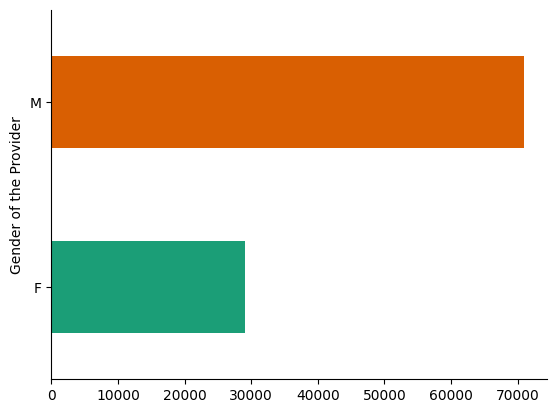

In [24]:
# @title Gender of the Provider
print(df.groupby('Gender of the Provider').size())

df.groupby('Gender of the Provider').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Entity Type of the Provider
I    95746
O     4254
dtype: int64


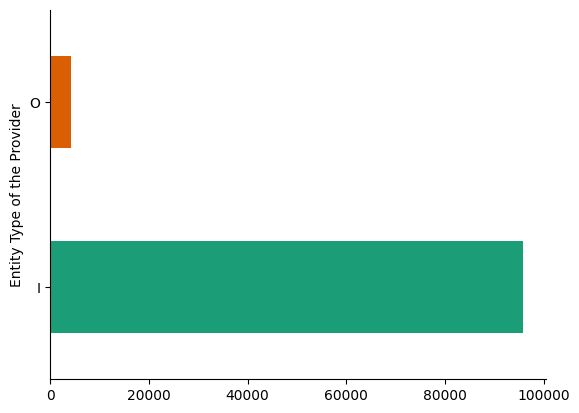

In [25]:
# @title Entity Type of the Provider
print(df.groupby('Entity Type of the Provider').size())
df.groupby('Entity Type of the Provider').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


* This graph shows that individual entity of the providers are more than the the organizational providers.

* The above plot shows that the male providers is more than the female providers.

Medicare Participation Indicator
N       31
Y    99969
dtype: int64


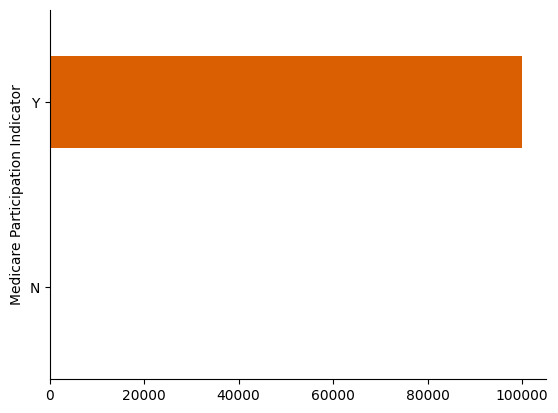

In [26]:
# @title Medicare Participation Indicator
print(df.groupby('Medicare Participation Indicator').size())

df.groupby('Medicare Participation Indicator').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* **medicare_participation_indicator** - Identifies whether the provider participates in Medicare and/or accepts the assigned assignment of Medicare allowed amounts.
* According to the graph there is a less quantity of providers which does not participate in medicare.

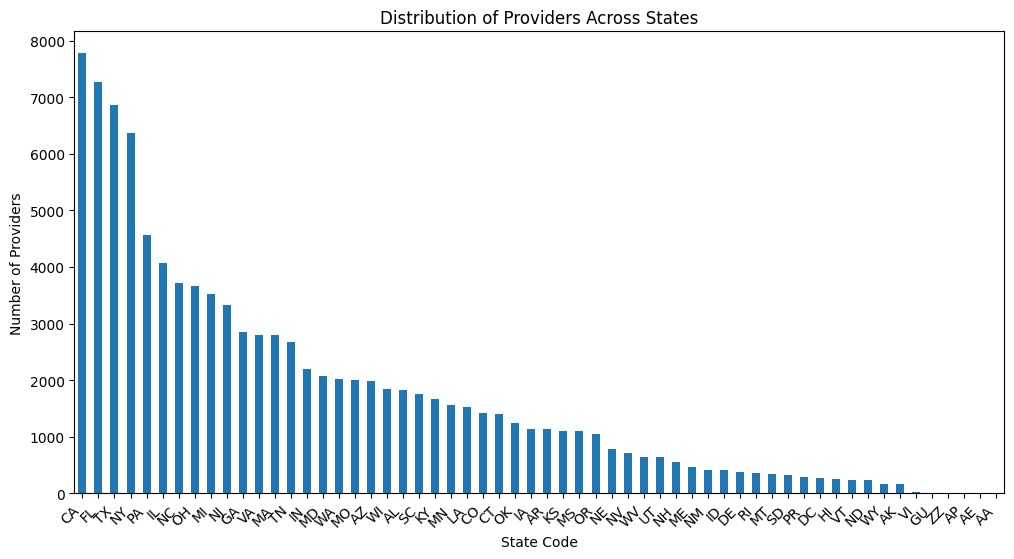

In [27]:
# @title Distribution of Providers Across States

# Count the number of providers in each state
state_counts = df['State Code of the Provider'].value_counts()

# Plot the bar chart
state_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Providers Across States')
plt.xlabel('State Code')
plt.ylabel('Number of Providers')
_ = plt.xticks(rotation=45, ha='right')

## Bivariate Analysis


---







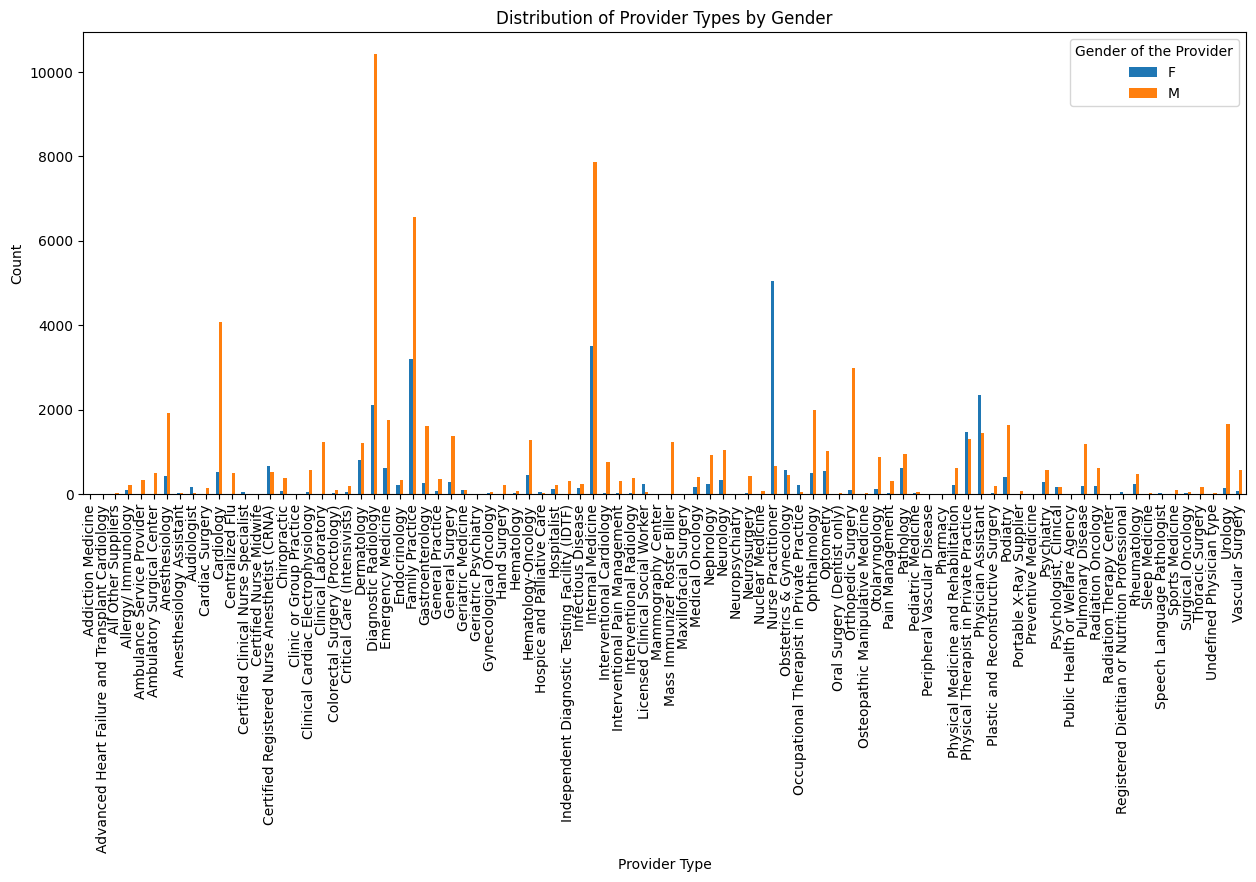

In [28]:
# @title Distribution of Provider Types by Gender
# Group the data by 'Provider Type' and 'Gender of the Provider'
provider_gender = df.groupby(['Provider Type', 'Gender of the Provider'])['National Provider Identifier'].count().unstack()

# Plot the grouped bar chart
provider_gender.plot(kind='bar', figsize=(15, 6))
plt.title('Distribution of Provider Types by Gender')
plt.xlabel('Provider Type')
plt.ylabel('Count')
_ = plt.xticks(rotation=90)

In [29]:
df['Provider Type'].nunique()

90

**Inference**


*   Top 3 Male providers are **Diagnostic Radiology, Family Practice and Interna Medicine**.

*   Top 3 Female providers are **Nurse Practitioner, Internal Medicine and Family practice**.
*   There are 90 unique Providers in the dataset.





In [30]:
# @title Visualization for numerical columns

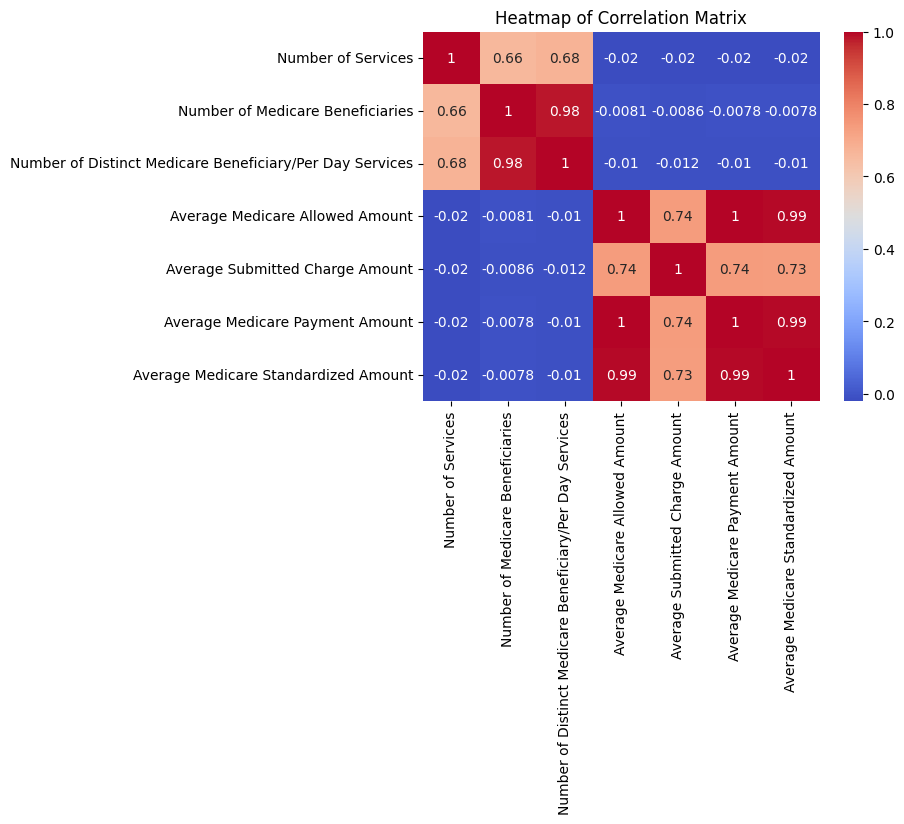

In [31]:
# @title Heatmap for the numerical columns
corr_matrix = df[['Number of Services', 'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

**Inference**


*   Above heatmap is plotted using the numerical columns.

*   This shows the correlation between different features.

*   Some of the features are highly correlated and many of them are slightly correlated.



In [33]:
df.columns

Index(['National Provider Identifier', 'Name of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address of the Provider',
       'City of the Provider', 'Zip Code of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator',
       'Number of Services', 'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

Text(0.5, 1.0, 'Average Submitted Charge Amount vs Average Medicare Allowed Amount')

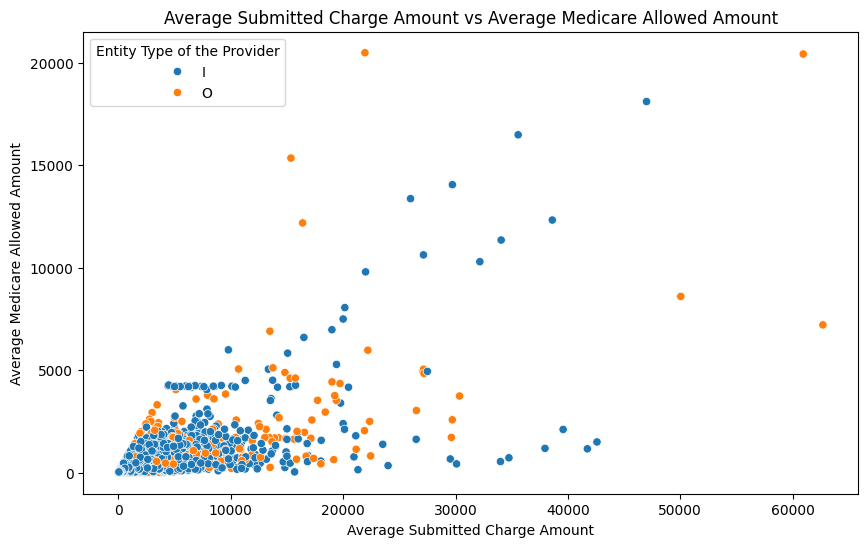

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='Average Submitted Charge Amount',y='Average Medicare Allowed Amount',
                hue='Entity Type of the Provider')
plt.title('Average Submitted Charge Amount vs Average Medicare Allowed Amount' )


Text(0.5, 1.0, 'Average Medicare Standardized Amount vs Average Medicare Payment Amount')

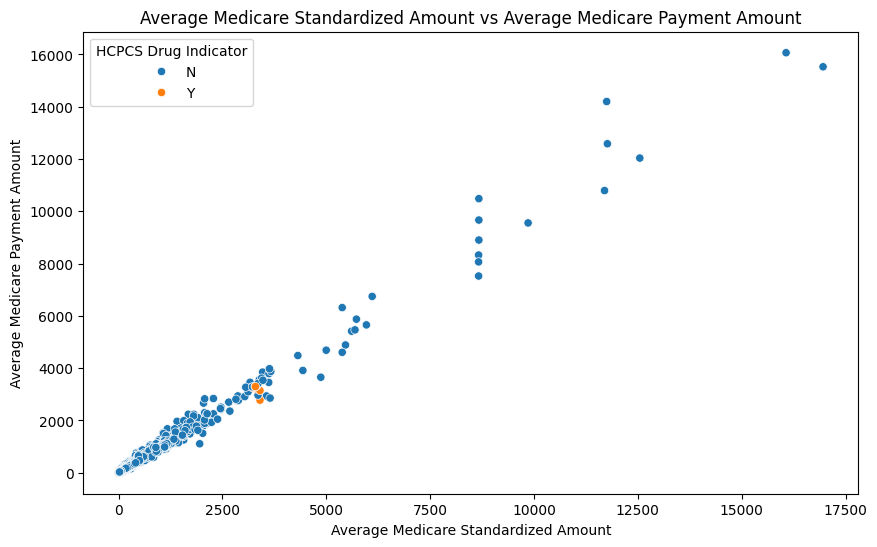

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='Average Medicare Standardized Amount',y='Average Medicare Payment Amount',
                hue='HCPCS Drug Indicator')
plt.title( 'Average Medicare Standardized Amount vs Average Medicare Payment Amount' )

**Inference**


*   The above plot shows some outlier present in the features.
*   The above features are highly correlated.

